#### SCOTv1 performance on ambiguous datasets

In [1]:
import yaml
import os
from sklearn.preprocessing import normalize

import sys
sys.path.insert(1, '../../src/')
from run_baselines.scot import scotv1
from run_baselines.scot import scotv2
from run_baselines.run_mmdma import mmdma_case
from pamona import Pamona
from utils.utils import *
from utils.vis import *
sys.path.insert(1, '../../src/run_baselines/')
from run_baselines.unioncom import UnionCom
%matplotlib inline

Running on cpu


In [2]:
# load parameters and datasets
with open("../cfgs/SNARE.yaml", "r") as file:
        params = yaml.safe_load(file)

data_url1 = os.path.join('..', params["data_path"], params["data_url1"])
data_url2 = os.path.join('..', params["data_path"], params["data_url2"])
assert os.path.isfile(data_url1) and os.path.isfile(data_url2)

label_url1 = os.path.join('..', params["data_path"], params["label_url1"])
label_url2 = os.path.join('..', params["data_path"], params["label_url2"])
assert os.path.isfile(label_url1) and os.path.isfile(label_url2)

data1 = load_data(data_url1, )
data2 = load_data(data_url2, )
print("data size: data1 = {}, data2 = {}".format(data1.shape, data2.shape))

label1 = load_data(label_url1, ).astype(int)
label2 = load_data(label_url2, ).astype(int)

if params["norm"]: 
        data1 = normalize(data1, norm=params["norm"])
        data2 = normalize(data2, norm=params["norm"])

if params["sort"]: 
        data1, label1, _ = sorted_by_label(data1, label1)
        data2, label2, _ = sorted_by_label(data2, label2)

data size: data1 = (1047, 19), data2 = (1047, 10)
Labels in order[1 2 3 4]
Label distribution: Counter({1: 379, 2: 324, 3: 201, 4: 143})
Labels in order[1 2 3 4]
Label distribution: Counter({1: 379, 2: 324, 3: 201, 4: 143})


#### 1. SCOT v1

It.  |Err         
-------------------
    0|1.750003e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.940978e-04|
   20|3.701998e-05|
   30|1.035191e-05|
   40|2.713909e-06|
   50|6.927895e-07|
   60|1.755648e-07|
   70|4.440622e-08|
   80|1.122632e-08|
   90|2.837773e-09|
  100|7.173060e-10|
It.  |Err         
-------------------
    0|1.758021e-03|


/Users/h46zhou/Documents/anaconda3/envs/sonata_public/lib/python3.8/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|4.650066e-04|
   20|5.551472e-05|
   30|1.489434e-05|
   40|4.868141e-06|
   50|1.787543e-06|
   60|7.141842e-07|
   70|3.011861e-07|
   80|1.308225e-07|
   90|5.766123e-08|
  100|2.559230e-08|
  110|1.139643e-08|
  120|5.083008e-09|
  130|2.268915e-09|
  140|1.013200e-09|
  150|4.525532e-10|


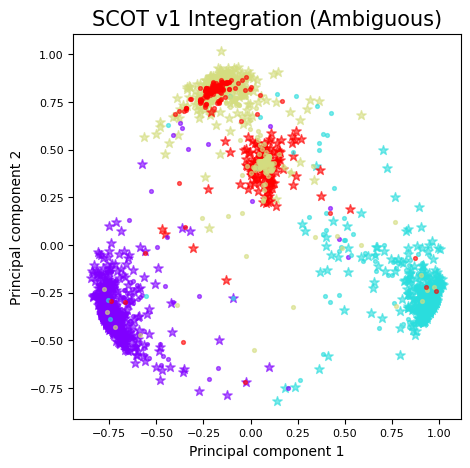

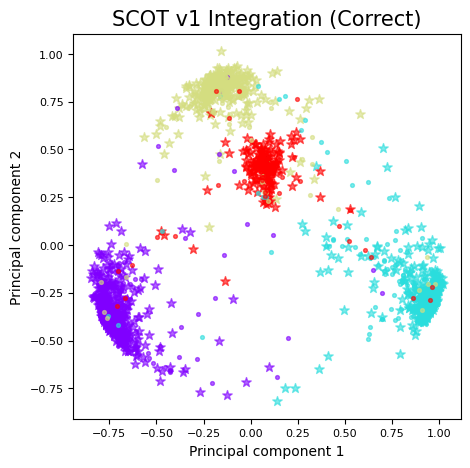

In [3]:
# Ambiguous solution
scot_instance = scotv1.SCOT(data1, data2)
X_aligned_case1, y_aligned_case1 = scot_instance.align(k=20, e=0.001, mode='connectivity', metric='correlation', normalize=False)

# Correct solution
scot_instance = scotv1.SCOT(data1, data2)
X_aligned_case2, y_aligned_case2 = scot_instance.align(k=110, e=0.001, mode='connectivity', metric='correlation', normalize=False)

plt_mapping_by_labels(X_aligned_case1, y_aligned_case1, label1, label2, title = "SCOT v1 Integration (Ambiguous)", a = 0.6, show=True)  
plt_mapping_by_labels(X_aligned_case2, y_aligned_case2, label1, label2, title = "SCOT v1 Integration (Correct)", a = 0.6, show=True)  

#### 2. SCOT v2

computing intra-domain graph distances
running pairwise dataset alignments
Unbalanced GW step: 0
FLAGS [True]
Projection Method embedding


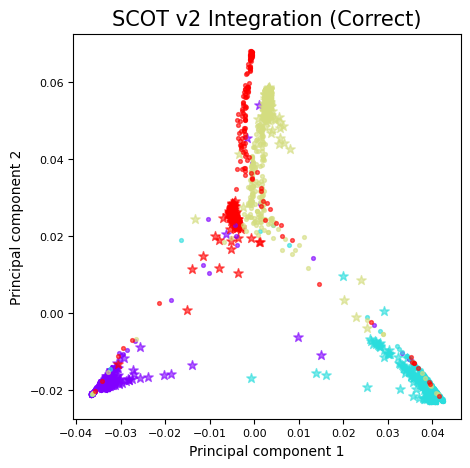

In [4]:
# Correct case, no ambiguous cases in the tested parameter range.
scot_instance = scotv2.SCOTv2([data1, data2])
integrated_data_case2 = scot_instance.align(k=20, eps=0.01, rho=0.1,  mode='connectivity', metric='correlation', normalize=False)

plt_mapping_by_labels(integrated_data_case2[0], integrated_data_case2[1], label1, label2, title = "SCOT v2 Integration (Correct)", a = 0.6, show=True)  

#### 3. MMDMA

Number of dimensions of latent space... 4
Calculated sigma: 0.24679167928474133
Number of dimensions of latent space... 4
Calculated sigma: 0.2530047038413272


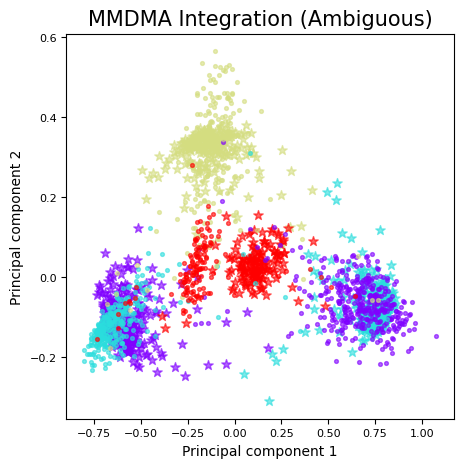

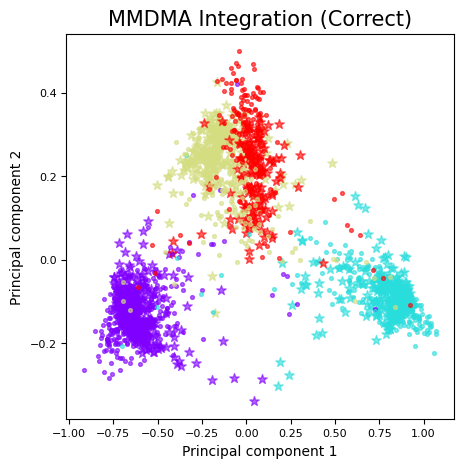

In [8]:
# Ambiguous case
data1_new_case1, data2_new_case1, mapping_case1 = mmdma_case(data1, data2, lambda1=1e-5, lambda2=1e-5, seed=13, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")

# Correct case
data1_new_case2, data2_new_case2, mapping_case2 = mmdma_case(data1, data2, lambda1=1e-5, lambda2=1e-5, seed=0, epoch=5000, sigma=0.0, nfeat=4, kernel="linear")

plt_mapping_by_labels(data1_new_case1, data2_new_case1, label1, label2, title = "MMDMA Integration (Ambiguous)", a = 0.6, show=True)  
plt_mapping_by_labels(data1_new_case2, data2_new_case2, label1, label2, title = "MMDMA Integration (Correct)", a = 0.6, show=True)  

#### 4. Pamona

Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|6.906244e-04|
   10|9.238119e-05|
   20|1.295830e-06|
   30|1.483522e-08|
   40|1.695852e-10|
Pamona Done! takes 20.292319 seconds
Pamona start!
use random seed: 666
Epoch.|Loss        
-------------------
    0|6.899421e-04|
   10|2.337958e-04|
   20|8.539988e-08|
   30|1.118194e-11|
Pamona Done! takes 15.035372 seconds


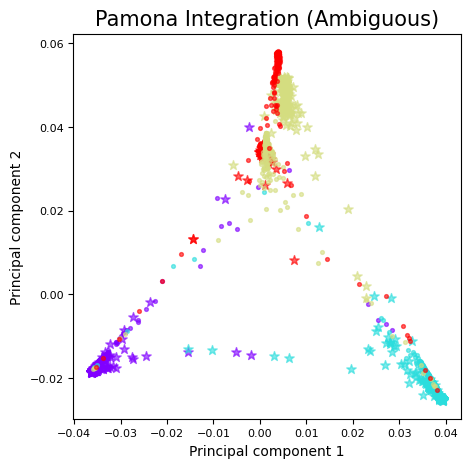

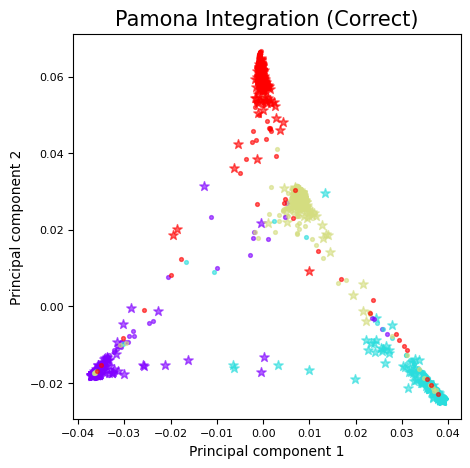

In [6]:
# Ambiguous case
pa = Pamona.Pamona(epsilon=0.01, Lambda=1.0, n_neighbors=6, n_shared=None, mode='connectivity', metric='correlation')
integrated_data_case1, mapping_case1 = pa.run_Pamona([data1, data2])

# Correct case
pa = Pamona.Pamona(epsilon=0.01, Lambda=1.0, n_neighbors=5, n_shared=None, mode='connectivity', metric='correlation')
integrated_data_case2, mapping_case2 = pa.run_Pamona([data1, data2])

plt_mapping_by_labels(integrated_data_case1[0], integrated_data_case1[1], label1, label2, title = "Pamona Integration (Ambiguous)", a = 0.6, show=True)  
plt_mapping_by_labels(integrated_data_case2[0], integrated_data_case2[1], label1, label2, title = "Pamona Integration (Correct)", a = 0.6, show=True)  

#### 5. UnionCom

use random seed: 666
Shape of Raw data
Dataset 0: (1047, 19)
Final k = 11
Dataset 1: (1047, 10)
Final k = 11
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:7.6953 alpha:12.8736
epoch:[200/2000] err:1.0310 alpha:1.7248
epoch:[300/2000] err:0.1381 alpha:0.2311
epoch:[400/2000] err:0.0185 alpha:0.0310
epoch:[500/2000] err:0.0025 alpha:0.0041
epoch:[600/2000] err:0.0003 alpha:0.0006
epoch:[700/2000] err:0.0000 alpha:0.0001
epoch:[800/2000] err:0.0000 alpha:0.0000
epoch:[900/2000] err:0.0000 alpha:0.0000
epoch:[1000/2000] err:0.0809 alpha:0.1353
epoch:[1100/2000] err:0.3059 alpha:0.5121
epoch:[1200/2000] err:0.4244 alpha:0.7110
epoch:[1300/2000] err:0.4727 alpha:0.7926
epoch:[1400/2000] err:0.4908 alpha:0.8240
epoch:[1500/2000] err:0.4973 alpha:0.8358
epoch:[1600/2000] err:0.4992 alpha:0.8403
epoch:[1700/2000] err:0.4995 alpha:0.8422
epoch:[1800/2000] err:0.4992 alpha:0.8430
epoch:[1900/2000] err:0.4987 alpha:0.8435

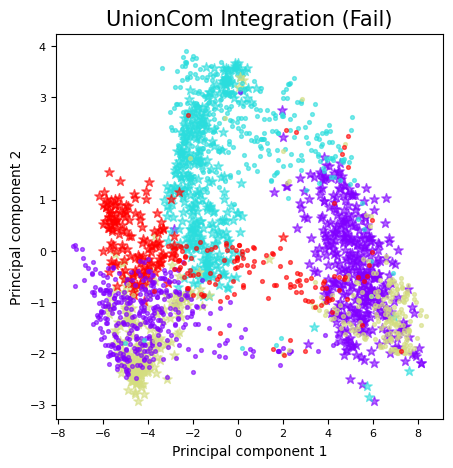

In [7]:
# Fail case
uc = UnionCom.UnionCom(rho=1, kmin=11, epoch_pd=2000, epsilon=0.01, log_pd=100)
integrated_data_case1, mapping_case1 = uc.fit_transform(dataset=[data1,data2])

plt_mapping_by_labels(integrated_data_case1[0], integrated_data_case1[1], label1, label2, title = "UnionCom Integration (Fail)", a = 0.6, show=True)  